In [7]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve, plot_confusion_matrix
import pandas as pd

In [3]:
data = pd.read_csv("/home/jorge/tfm-jvm/data/data/data_7.csv")
target_classic = pd.read_csv("/home/jorge/tfm-jvm/data/data/target_classic.csv")
clusters = pd.read_csv("/home/jorge/tfm-jvm/data/data/clusters.csv")
X = data.merge(clusters, on="id_p")
X = X.merge(target_classic, on="id_p")

## Split

In [4]:
del X["id_p"], X["n_days"]
y = X["inactive"]
del X["inactive"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

## Stacking

In [28]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, criterion="gini", min_impurity_decrease=0, n_jobs=-1)),
    ('gr', GradientBoostingClassifier(n_estimators=150, max_depth=11, loss="deviance", learning_rate=0.2))
]

clf = StackingClassifier(estimators=estimators, n_jobs=-1, verbose=1, stack_method="predict_proba",
                         final_estimator=RandomForestClassifier(n_estimators=100, max_depth=None, criterion="gini", min_impurity_decrease=0, n_jobs=-1))

In [29]:
%time
clf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                       

## Results

In [31]:
clf.score(X_test, y_test)

0.9722297710442286

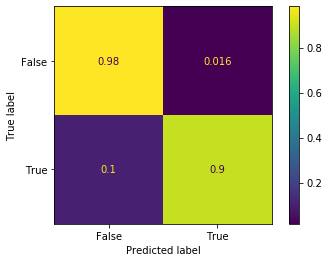

In [30]:
plot_confusion_matrix(clf, X_test, y_test, normalize="true")